<a href="https://colab.research.google.com/github/namita0210/longevity-prediction/blob/main/Longevity_prediction_(Milestone2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link :- [Neonatal Dataset from Kaggle](https://www.kaggle.com/datasets/programmerrdai/child-and-infant-mortality?select=neonatal-deaths-by-cause.csv)
<br>
PPT LINK:- [Milestone 2](https://docs.google.com/presentation/d/1NU6qruqAdhOgB6Xg53q1LmW3fba8a4ZVBpaffNjoYj0/edit?usp=sharing)

<u><b>CONTENTS</b></u>

*   Milestone-2 (EDA & Visualisation) [M2 cell](https://colab.research.google.com/drive/1fR_WuE5FLUFQ-98as_Vitp7Qke_mSdKR#scrollTo=t3O_UiNF8Bma&line=2&uniqifier=1)
*   Milestone-3 (Train-test-validation split and model fitting)[M3 cell](https://colab.research.google.com/drive/1fR_WuE5FLUFQ-98as_Vitp7Qke_mSdKR#scrollTo=LZcclxrAtENK)
*   Milestone-4 Evaluation metrics[M4 cell](https://colab.research.google.com/drive/1fR_WuE5FLUFQ-98as_Vitp7Qke_mSdKR#scrollTo=t3O_UiNF8Bma&line=2&uniqifier=1)



<b><u>Guidelines</b></u>
*   M1: Background/Objective/Problem statement + Dataset of any domain of your choice and identification of related research paper by 28 September

*   M2:  Data cleaning + Exploratory Data Analysis (statistical description as well as visualization) by 19 October

*   M3: Model Fitting (Train-Validate-Test split) using all relevant methods studied in class by 27 October

*   M4: Evaluation metrics/Confusion Matrix/ROC-AUC + Visualization, Interpretation of results by 2 November

*   M5: Techniques for improving model performance (Hyper parameter Tuning, Class balancing, Feature Engineering, Regularization, Ensemble Learning, Hybrid Approaches, etc.) by 16 November

*   M6: (Optional for bonus points) Plugin/pickle file/extension/web or mobile app, i.e. distributable end product by 14 December






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path='/content/drive/MyDrive/ML Project/neonatal-deaths-by-cause.csv'

Read the data

In [ ]:
column_names=['Entity', 'Code', 'Year','Diarrheal','Congenital birth defects','Hemolytic disease & jaundice','Malaria'
,'respiratory infections','Meningitis','Neonatal encephalopathy due to birth asphyxia and trauma','preterm birth',
'Tetanus','unspecified infectious diseases','neonatal disorders','Neonatal sepsis and other neonatal infections','HIV','Total']

In [ ]:
df = pd.read_csv(path,names=column_names)

In [ ]:
df=df.dropna(axis=1)

In [ ]:
df.shape

(6841, 15)

In [ ]:
#cols with numerical values
sum_these_cols=[ 'Diarrheal', 'Congenital birth defects',
       'Hemolytic disease & jaundice', 'Malaria', 'respiratory infections',
       'Meningitis',
       'Neonatal encephalopathy due to birth asphyxia and trauma',
       'preterm birth', 'Tetanus', 'unspecified infectious diseases',
       'neonatal disorders', 'Neonatal sepsis and other neonatal infections',
       'HIV']

In [ ]:
df = df.iloc[1: , :]

In [ ]:
df['Total'] = df[sum_these_cols].sum(axis=1)
df=df.dropna()

Describe the dataset

In [ ]:
df.describe()

,Total
count,6.840000e+03
mean,1.880588e+70
std,5.767487e+71
min,0.000000e+00
25%,1.558296e+16
50%,5.519409e+24
75%,1.229226e+40
max,1.993584e+73


In [ ]:
print("The shape of this data:",df.shape)

The shape of this data: (6150, 16)


<h1><u>segregation of data</u></h1>
 - When selecting subsets of data, square brackets [] are used.
 - Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.
 - Select specific rows and/or columns using loc when using the row and column names.
 - Select specific rows and/or columns using iloc when using the positions in the table.

In [ ]:
#External
ext= df[['Diarrheal'
        ,'Meningitis'
        ,'Hemolytic disease & jaundice'
        ,'Malaria']]
#transmitted diseases
trans =df[['HIV'
          ,'Congenital birth defects'
          ,'Neonatal encephalopathy due to birth asphyxia and trauma'
          ,'Tetanus']]
#unspecified reasons for death
unspec =df[['unspecified infectious diseases'
           ,'neonatal disorders'
           ,'Neonatal sepsis and other neonatal infections'
           ,'preterm birth']]

<h1><b>Visualization</b></h1>

<b>Visualizations for every dataframe partition</b>

<h2>External death factors</h2>

In [ ]:
ext=ext[:500]

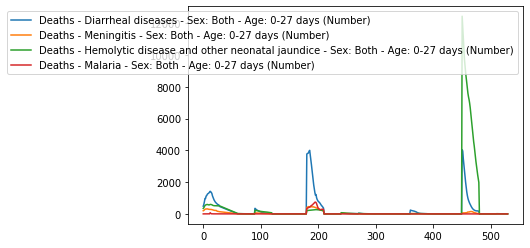

In [ ]:
#Line graph
ext.plot()

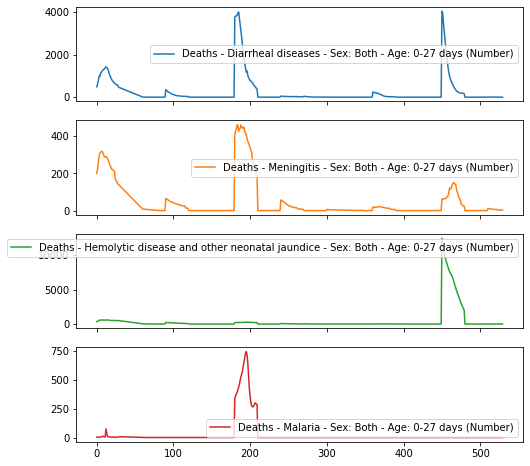

In [ ]:
# Line Graph for all columns
ext.plot(subplots=True, figsize=(8, 8));

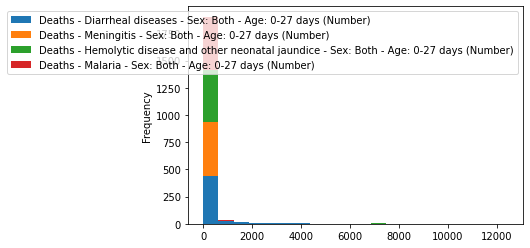

In [ ]:
#histogram
ext.plot.hist(stacked=True, bins=20);

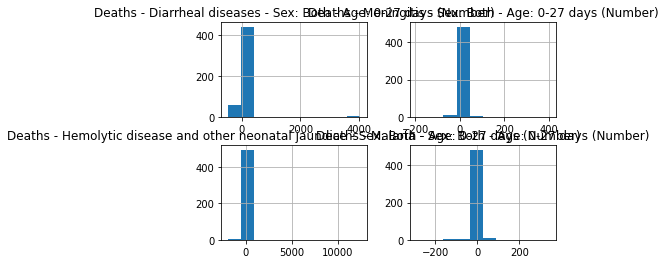

In [ ]:
#hist for each column
ext.diff().hist();

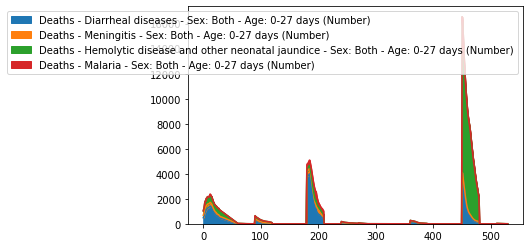

In [ ]:
#Area plot
ext.plot.area()

<h2>Transmitted diseases</h2>

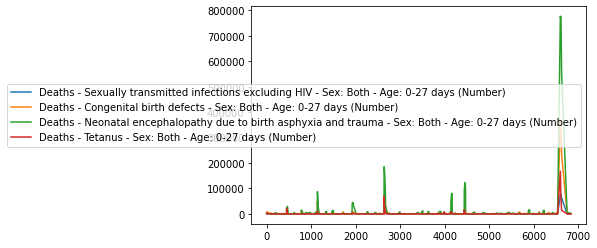

In [ ]:
#Line graph
trans.plot()

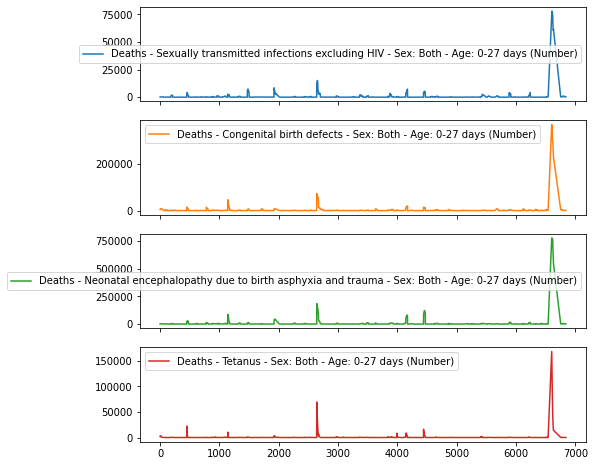

In [ ]:
#line graph for each column
trans.plot(subplots=True, figsize=(8, 8));

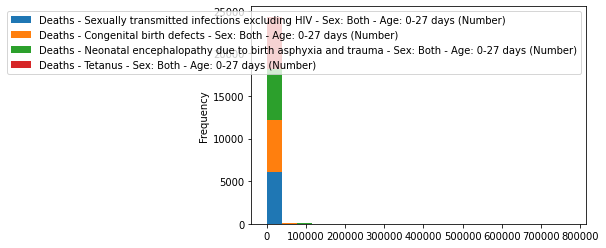

In [ ]:
#histogram
trans.plot.hist(stacked=True, bins=20);

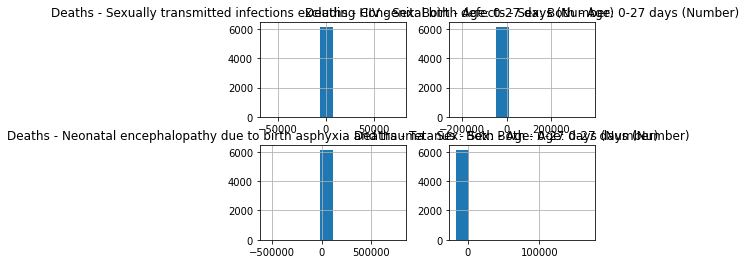

In [ ]:
#hist for each column
trans.diff().hist();

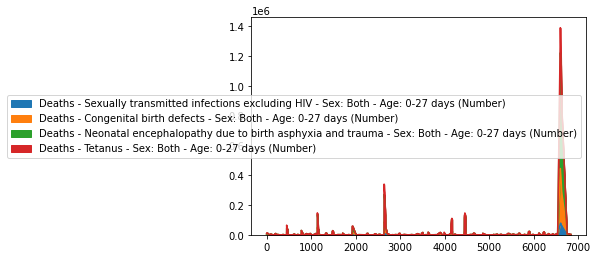

In [ ]:
#Area plot
trans.plot.area()

<h2>Unspecified diseases</h2>

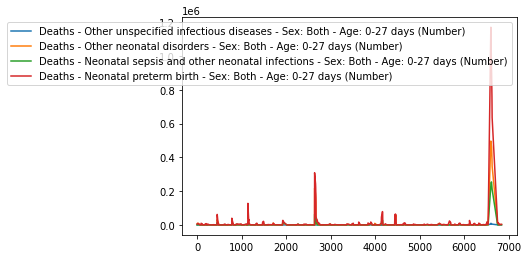

In [ ]:
#line graph for unspecified diseases
unspec.plot()

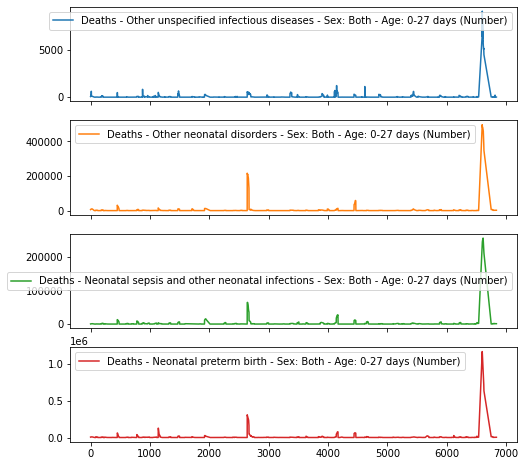

In [ ]:
#line graph for all columns
unspec.plot(subplots=True, figsize=(8, 8));

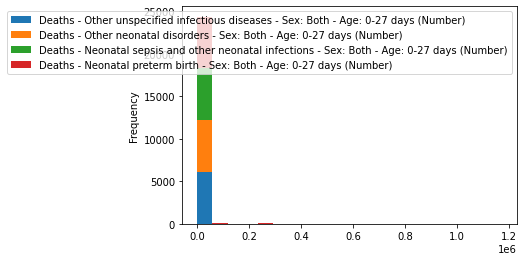

In [ ]:
#histogram
unspec.plot.hist(stacked=True, bins=20);

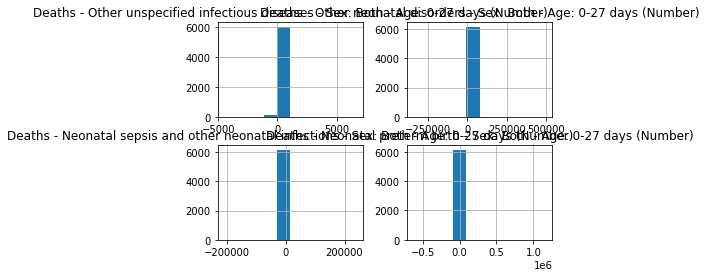

In [ ]:
#hist for each column
unspec.diff().hist();

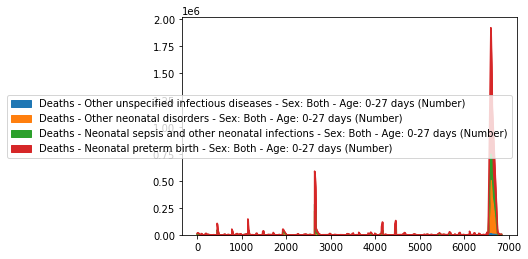

In [ ]:
#Area plot
unspec.plot.area()

In [ ]:
x=malaria[:100]
y=year

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


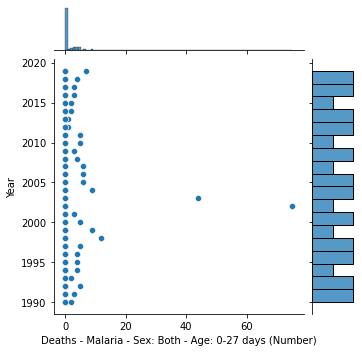

In [ ]:
sns.jointplot(x,y, data=df, size=5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


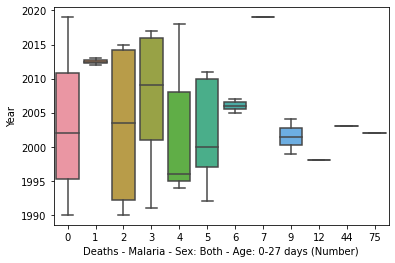

In [ ]:
sns.boxplot(x,y, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


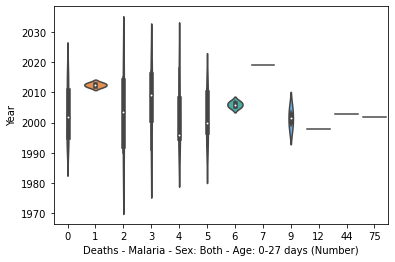

In [ ]:
sns.violinplot(x,y, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


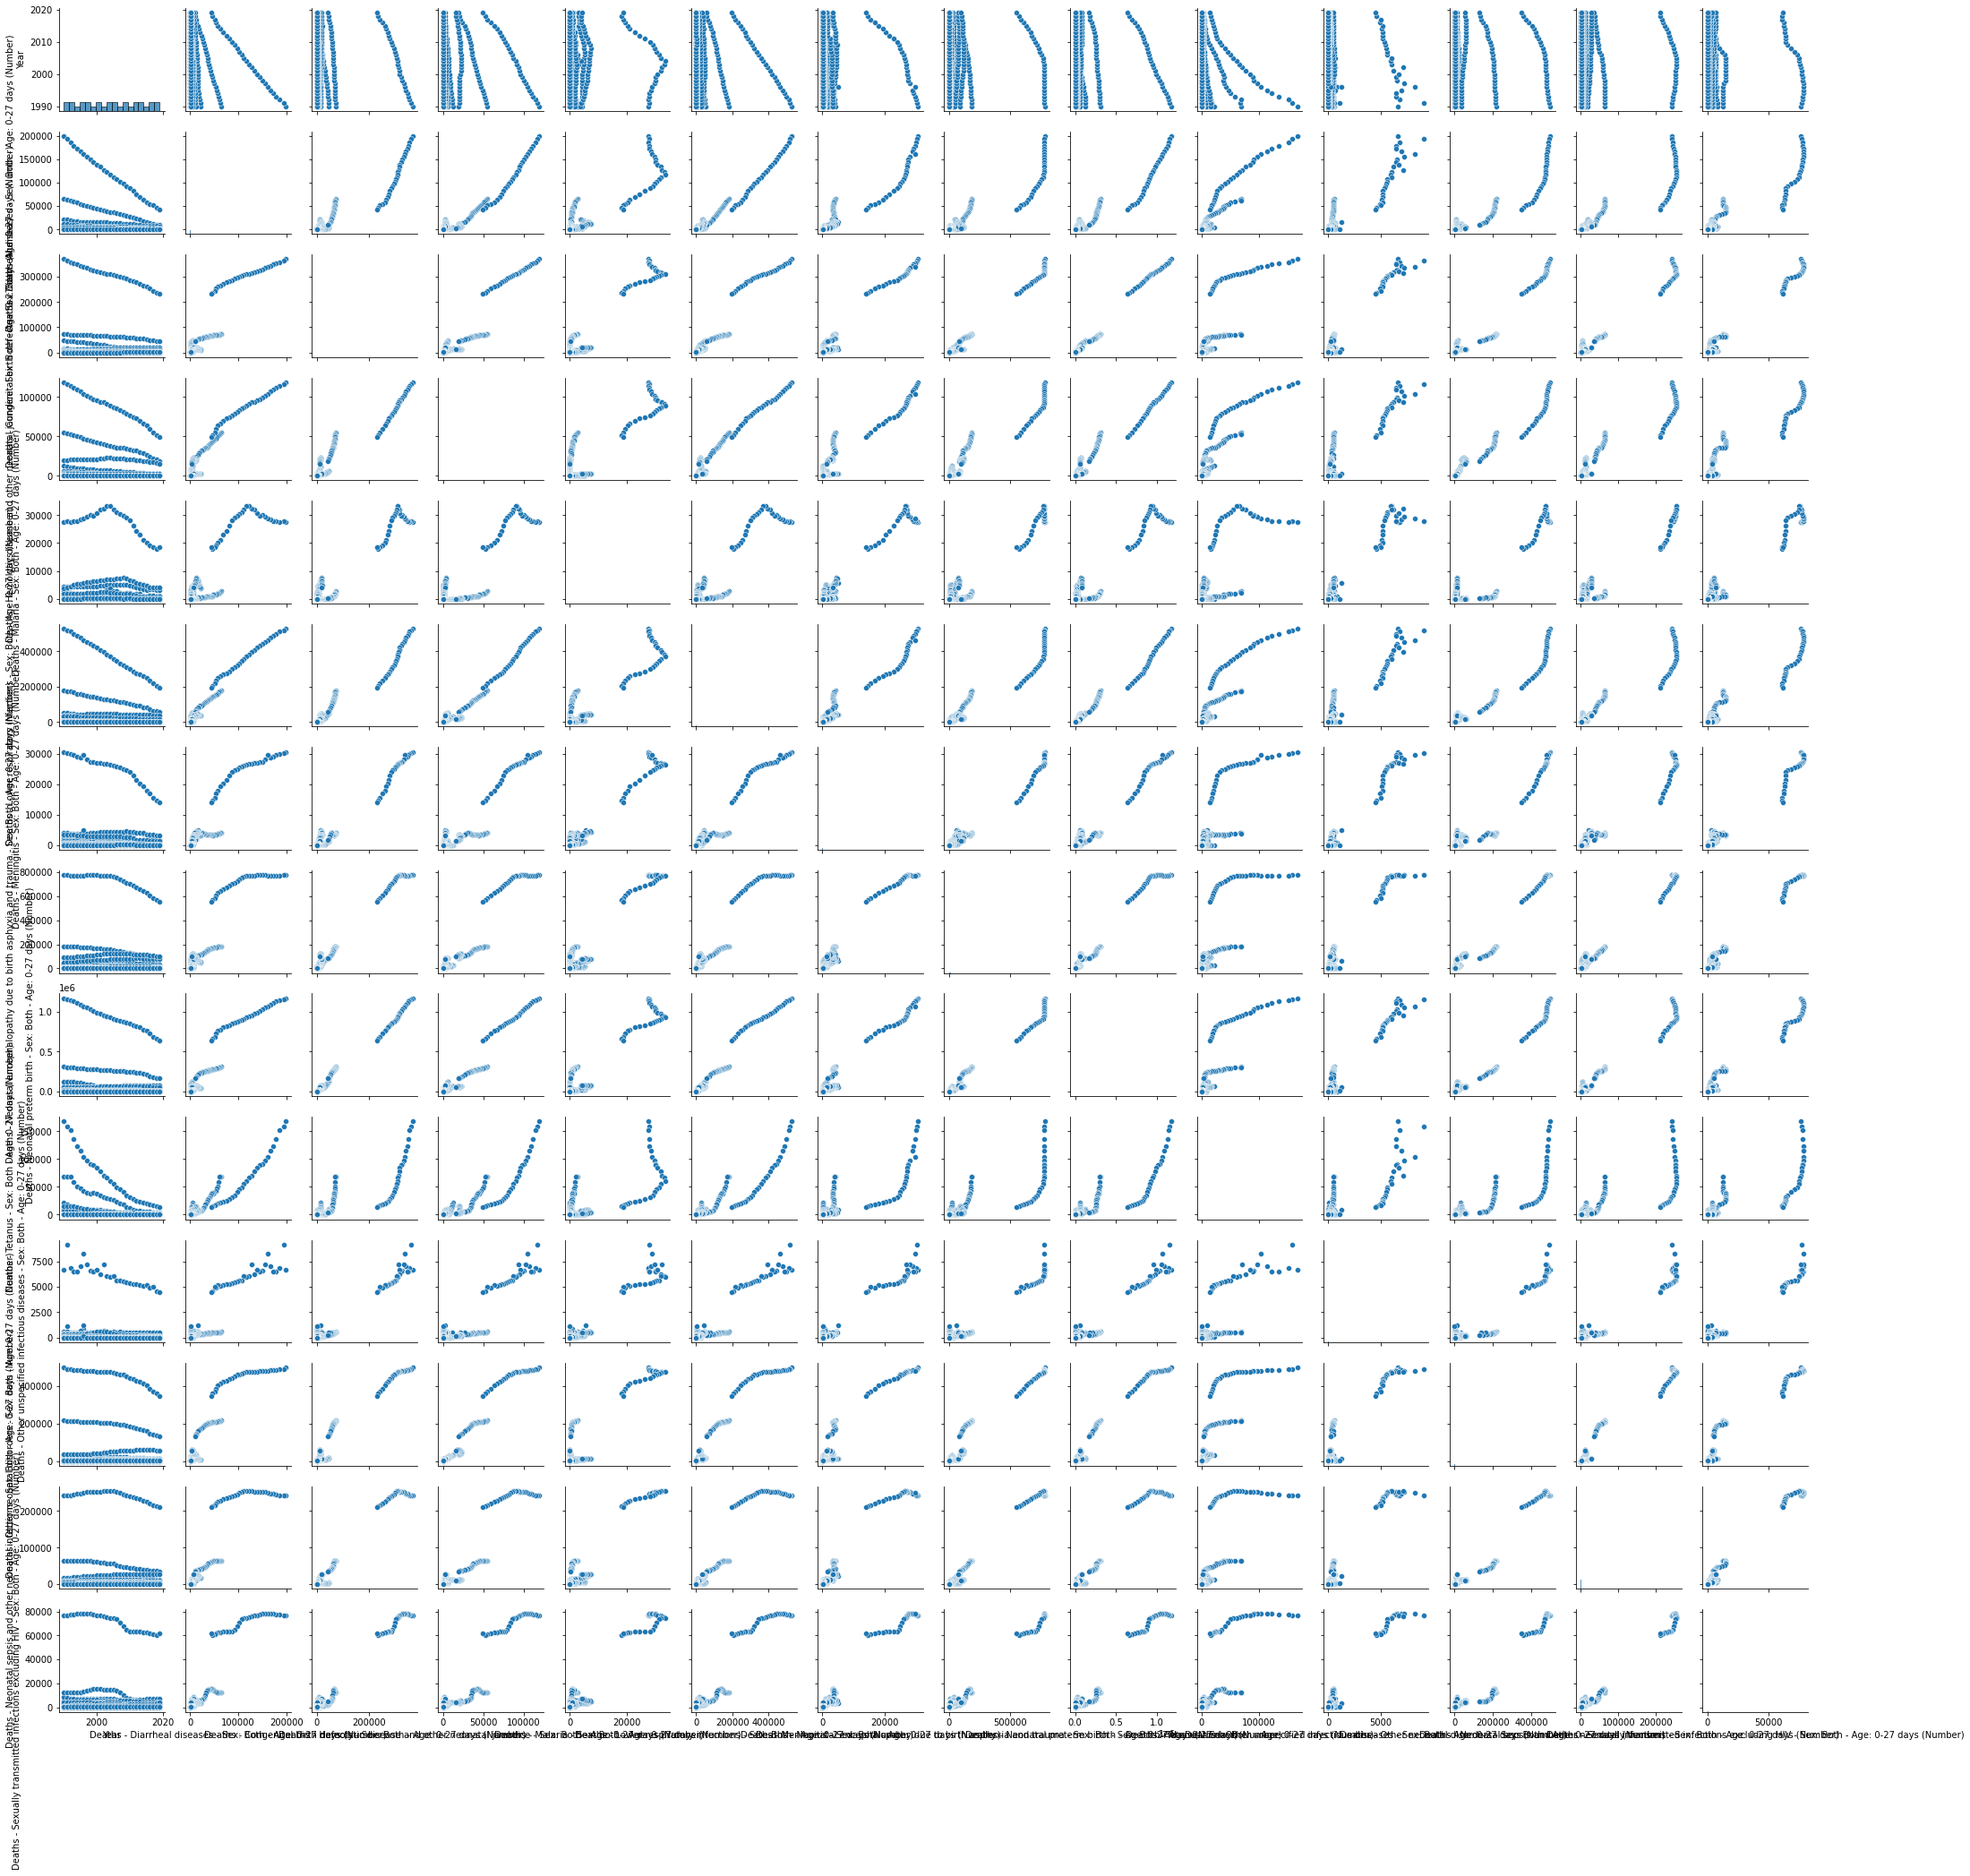

In [ ]:
sns.pairplot( data=df)

<h2>Comparisons of deaths from earlier times to current times</h2>

<b>Diarhea in early times with joinplot(External diseases example)</b>

In [ ]:
dirhea=df['Deaths - Diarrheal diseases - Sex: Both - Age: 0-27 days (Number)']
dirhea[:5]
y1=y[:5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


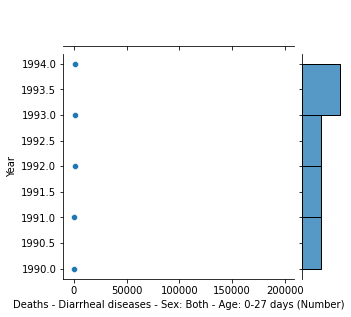

In [ ]:
sns.jointplot(dirhea,y1, data=df, size=5)

Diarhea now

In [ ]:
y2=y[:-5]
y2

0       1990
1       1991
2       1992
3       1993
4       1994
        ... 
6830    2010
6831    2011
6832    2012
6833    2013
6834    2014
Name: Year, Length: 6145, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


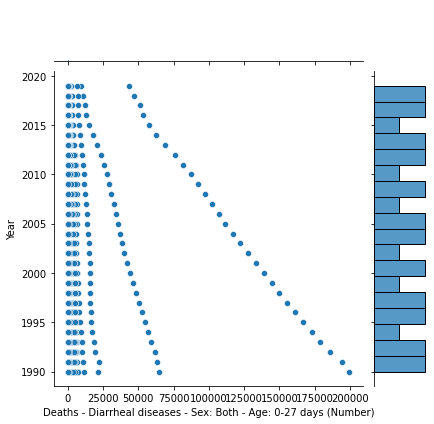

In [ ]:
sns.jointplot(dirhea,y, data=df)

<b>Deaths due to HIV before and now (transmitted diseases sample)</b>

In [ ]:
hiv=df['Deaths - Sexually transmitted infections excluding HIV - Sex: Both - Age: 0-27 days (Number)']


In [ ]:
hiv1=hiv[:5]

In [ ]:

hiv2=hiv[:-5]

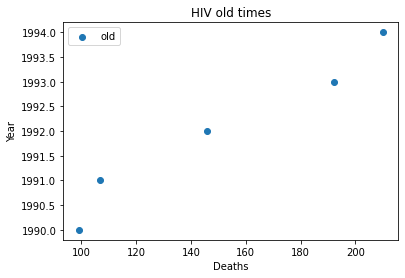

In [ ]:

plt.scatter(hiv1,y1, label='old')
# plt.scatter(hiv2,y2,color='blue')
plt.title('HIV old times')
plt.xlabel('Deaths')
plt.ylabel('Year')
plt.legend()
plt.show()


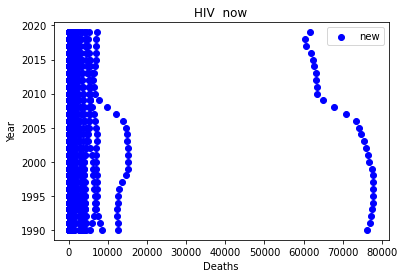

In [ ]:
plt.scatter(hiv2,y2,label='new',color='blue')
plt.title('HIV  now')
plt.xlabel('Deaths')
plt.ylabel('Year')
plt.legend()
plt.show()

<b>Deaths due to Neonatal infection(Unspecified disease example)</b>

In [ ]:
neo=df['Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: 0-27 days (Number)']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


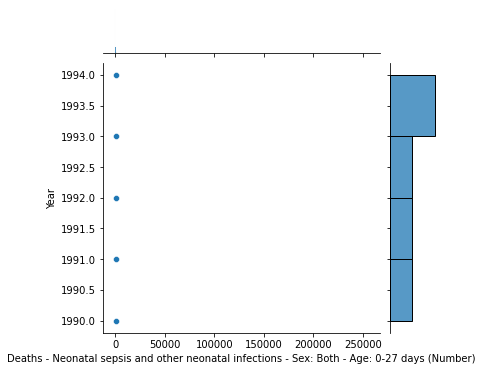

In [ ]:
sns.jointplot(neo,y1, data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


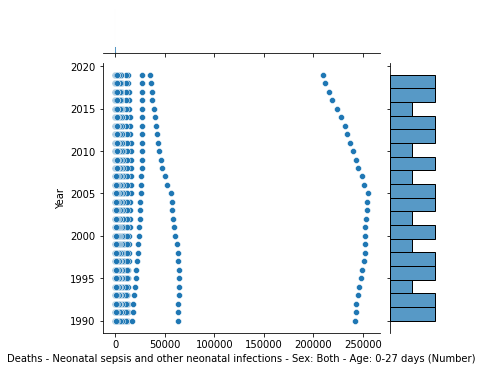

In [ ]:
sns.jointplot(neo,y2, data=df)

<h2>M3: Model Fitting (Train-Validate-Test split) using all relevant methods studied in class by 27 October</h2>

**External** Diseases

Add a new column for total deaths due to External diseases

In [ ]:
ext['extTotal'] = ext.sum(axis=1)

In [ ]:
ext = ext.iloc[1: , :]

In [ ]:
ext.head(2)

,Diarrheal,Meningitis,Hemolytic disease & jaundice,Malaria,extTotal
1,486,199,348,2,4861993482
2,598,218,390,3,5982183903


<b>Transmitted diseases</b>
<br> Add new column with sum of all deaths due to transmitted diseases

In [ ]:
trans['transTotal']=trans.sum(axis=1)

In [ ]:
trans=trans.iloc[1:,:]

In [ ]:
trans.head(2)

,HIV,Congenital birth defects,Neonatal encephalopathy due to birth asphyxia and trauma,Tetanus,transTotal
1,99,4872,1435,1894,99487214351894
2,107,5493,1633,2352,107549316332352


<b>Unspecified Diseases</b><br>
Add new column with sum of all deaths due to unspecified diseases

In [ ]:
unspec['unspecTotal']=unspec.sum(axis=1)

In [ ]:
unspec=unspec.iloc[1:,:]

In [ ]:
unspec.head(2)

,unspecified infectious diseases,neonatal disorders,Neonatal sepsis and other neonatal infections,preterm birth,unspecTotal
1,63,5811,363,5491,6358113635491
2,76,6281,453,6159,7662814536159


<b>Target and Feature selection</b>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
x=df[sum_these_cols] #faeture vector
y=df['Total'] #Target

In [ ]:
print(x.shape)
print(y.shape)

(6840, 13)
(6840,)


In [ ]:
best_features=SelectKBest(score_func=chi2,k=10)

In [ ]:
y=y.astype(int)

In [ ]:
fit=best_features.fit(x,y)

In [ ]:
fit.scores_

array([ 9456719.18022869, 25274752.04582582,  7219630.81892387,
        2078450.00893393, 30009277.75884857,  1946398.17995595,
       58466126.59800688, 76902994.8946615 ,  5640253.60984887,
         490699.38037604, 37666604.62313181, 19554447.49245286,
        5639915.28515564])

In [ ]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [ ]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['features','score']
featureScores.sort_values(by='score',ascending=True)

,features,score
9,unspecified infectious diseases,4.906994e+05
5,Meningitis,1.946398e+06
3,Malaria,2.078450e+06
12,HIV,5.639915e+06
8,Tetanus,5.640254e+06
2,Hemolytic disease & jaundice,7.219631e+06
0,Diarrheal,9.456719e+06
11,Neonatal sepsis and other neonatal infections,1.955445e+07
1,Congenital birth defects,2.527475e+07
4,respiratory infections,3.000928e+07


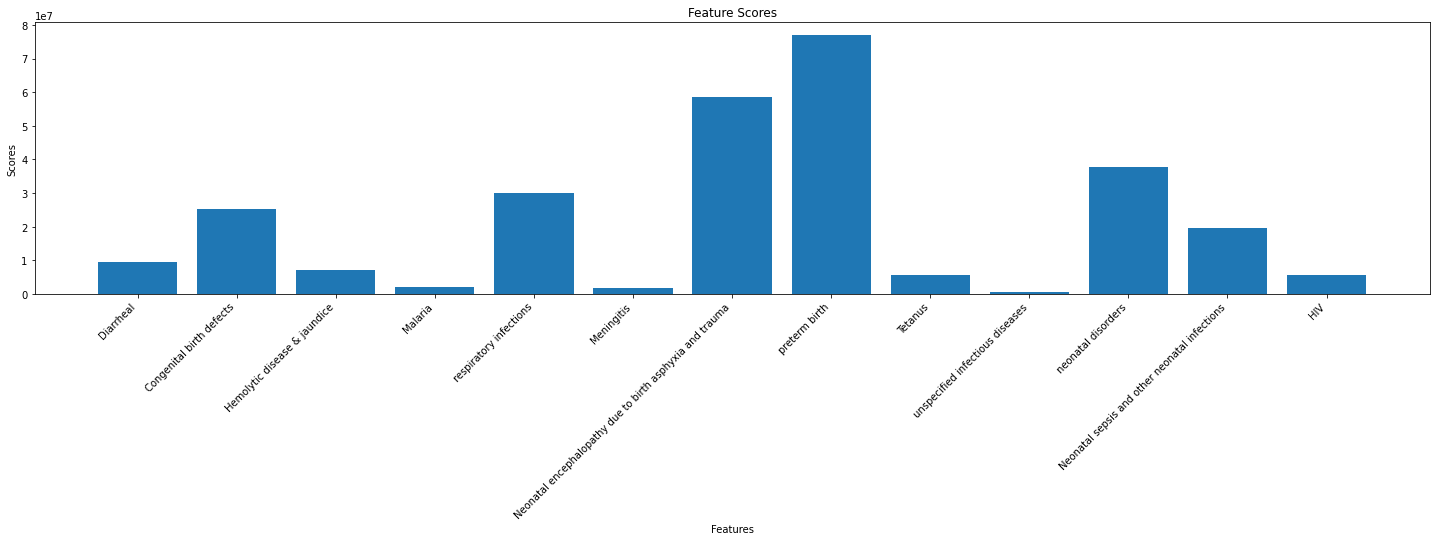

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,5))
plt.title('Feature Scores')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.bar(featureScores['features'],featureScores['score'])
plt.show()

Import libraries for train-test-split and model training

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Train and Validate split, <br>
For testing we have kept another set of partition from the data

In [ ]:
x_train,  y_train,x_val, y_val = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
print("train-X",x_train.shape
      ,"\n train-Y",y_train.shape
      ,"\n Validate-X",x_val.shape
      ,"\n validate_y",y_val.shape)

train-X (4788, 13) 
 train-Y (2052, 13) 
 Validate-X (4788,) 
 validate_y (2052,)


Decision tree without split

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=1)
model.fit(x,y)
predict = model.predict(x)
print("Prediction: ",predict)
print("\n Feature Importances: \n",model.feature_importances_)

Prediction:  [-9.22337204e+18 -9.22337204e+18 -9.22337204e+18 ... -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18]

 Feature Importances: 
 [9.68474602e-03 6.69716360e-03 1.74017916e-02 3.68554343e-12
 4.67438935e-02 2.19170560e-03 2.32171962e-02 8.18931779e-01
 0.00000000e+00 1.50908741e-07 3.32618138e-02 4.12002361e-02
 6.69523859e-04]


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y,predict)
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  9922319.956372298


Decision Tree Regressor after Splitting

In [ ]:
new_model = DecisionTreeRegressor(random_state=1)
new_model.fit(x_train,x_val)
new_prediction = new_model.predict(x_train)
new_mae = mean_absolute_error(x_val,new_prediction)
print("Prediction is :", new_prediction,"\n Mean Absolute Error is: ", new_mae)

print("\n Feature Importances: \n",new_model.feature_importances_)

Prediction is : [-9.22337204e+18  0.00000000e+00  1.73102283e+17 ... -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18] 
 Mean Absolute Error is:  3753169.5709032267

 Feature Importances: 
 [1.87912395e-02 8.72834471e-03 5.78887679e-03 1.83990143e-05
 3.76293420e-02 9.94215473e-04 1.93124848e-02 8.24912678e-01
 7.05720475e-12 1.66372557e-04 2.95764562e-02 4.74264305e-02
 6.65516057e-03]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
new_model = RandomForestRegressor(random_state=1)
new_model.fit(x_train,x_val)
new_pred = new_model.predict(x_train)
print("Prediction:", new_pred)
print("\n Feature Importances: \n",new_model.feature_importances_)

Prediction: [-9.22337204e+18  0.00000000e+00 -1.72714893e+17 ... -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18]

 Feature Importances: 
 [1.28150610e-02 1.08892778e-02 5.37902571e-03 3.26095139e-05
 3.87538041e-02 1.84481793e-03 6.67198633e-02 7.75047603e-01
 2.33430189e-04 9.62165558e-04 3.14609971e-02 4.80511409e-02
 7.81020394e-03]


In [ ]:
mae_rf = mean_absolute_error(x_val,new_pred)
mae_rf

4.784694066797143e+16

Linear regression

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, x_val)
# Make predictions using the testing set
y_pred = regr.predict(x_train)
print(y_pred)
# The coefficients
print("Coefficients: \n", regr.coef_)

[-8.45079256e+18 -5.81155515e+18 -5.82235488e+18 ... -6.07760192e+18
 -5.81071489e+18 -7.17204698e+18]
Coefficients: 
 [ 1.75524767e+13 -1.52600063e+14 -1.70576368e+14 -7.81681930e+13
  2.74762935e+12 -8.30312440e+13  2.24055949e+13  4.50123565e+13
  2.02905089e+13 -5.95287894e+14  1.21835326e+13 -4.61376876e+13
  2.09595689e+13]


In [ ]:
mae_lr = mean_absolute_error(x_val,y_pred)
mae_lr

4.079669319384096e+18

Linear SVC<br>
SVC expect int target, but we are feeding a float so we need to convert the target attribute into int for using SVC

In [ ]:
y=df['Total']
type(y)
print(y.dtype)
y = df['Total'].astype(int)

float64


In [ ]:
x_train,  y_train,x_val, y_val = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
print("train-X",x_train.shape
      ,"\n train-Y",y_train.shape
      ,"\n Validate-X",x_val.shape
      ,"\n validate_y",y_val.shape)

train-X (4788, 13) 
 train-Y (2052, 13) 
 Validate-X (4788,) 
 validate_y (2052,)


In [ ]:
from sklearn import svm

linearSvcModel=svm.LinearSVC(max_iter=10000)
linearSvcModel.fit(x_train, x_val)
predicted=linearSvcModel.predict(x_train)
predicted

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([-9223372036854775808,                    0,   115000701417500832,
       ..., -9223372036854775808, -9223372036854775808,
         194101647336007488])

In [ ]:
mae_svc = mean_absolute_error(x_val,predicted)
mae_svc

3.820824822786593e+18

<b><u><h1>MILESTONE-4</h1></u></b><br>
Evaluation metrics/Confusion Matrix/ROC-AUC<br> + Visualization,<br> Interpretation of results by 2 November



<b>Decision Tree Accuracy:</b><br>
Accuracy score is only for classification problems so we have used mean absolute error.

In [ ]:
print("Decision Tree Prediction :", new_prediction,"\n Mean Absolute Error is: ", new_mae)

Decision Tree Prediction : [-9.22337204e+18  0.00000000e+00  1.73102283e+17 ... -9.22337204e+18
 -9.22337204e+18 -9.22337204e+18] 
 Mean Absolute Error is:  3753169.5709032267


visualisation

In [ ]:
# type(new_prediction)
new_prediction= new_prediction.astype(int)

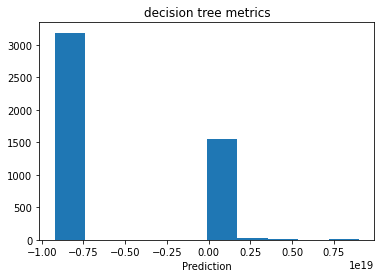

In [ ]:
import matplotlib.pyplot as plt
plt.title("decision tree metrics")
plt.hist(new_prediction)
plt.xlabel('Prediction')
plt.show()

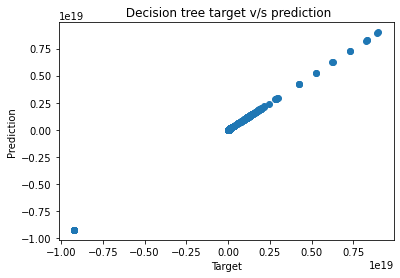

In [ ]:
plt.title(" Decision tree target v/s prediction")
plt.scatter(x_val,new_prediction)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

Random Forest Accuracy:

In [ ]:
#print("Random forest Prediction:", new_pred)
print("\n random forest error: ",mae_rf)


 random forest error:  4.784694066797143e+16


visualisation

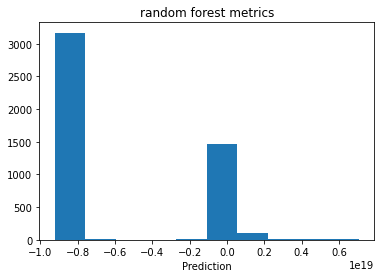

In [ ]:
import matplotlib.pyplot as plt
plt.title("random forest metrics")
plt.hist(new_pred)
plt.xlabel('Prediction')

plt.show()

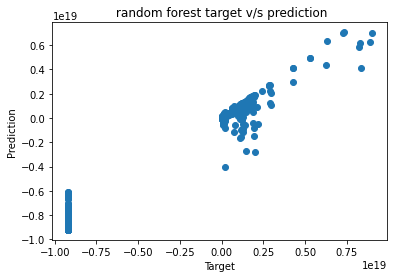

In [ ]:
plt.title(" random forest target v/s prediction")
plt.scatter(x_val,new_pred)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

Linear Regression Accuracy:

In [ ]:
print("Linear regression prediction: ",y_pred)
print("\n Linear regression error:", mae_lr)

Linear regression prediction:  [-8.45079256e+18 -5.81155515e+18 -5.82235488e+18 ... -6.07760192e+18
 -5.81071489e+18 -7.17204698e+18]

 Linear regression error: 4.079669319384096e+18


In [ ]:
print("Training accuracy: ",regr.score(x_train,x_val))
print("Testing accuracy: ",regr.score(y_train,y_val))

Training accuracy:  0.041358178811688795
Testing accuracy:  0.031189599440435423


visualisation

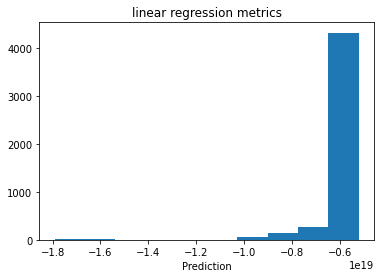

In [ ]:
import matplotlib.pyplot as plt
plt.title("linear regression metrics")
plt.hist(y_pred)
plt.xlabel('Prediction')

plt.show()

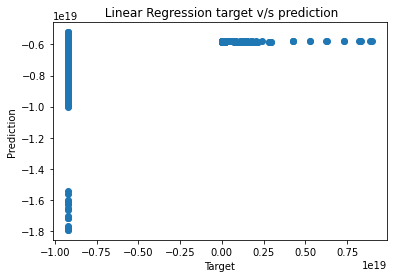

In [ ]:
plt.title(" Linear Regression target v/s prediction")
plt.scatter(x_val,y_pred)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

SVM Accuracy:

In [ ]:
print("SVM prediction: ",predicted)
print("\n SVM error: ",mae_svc)

SVM prediction:  [-9223372036854775808                    0   115000701417500832 ...
 -9223372036854775808 -9223372036854775808   194101647336007488]

 SVM error:  3.820824822786593e+18


visualisation

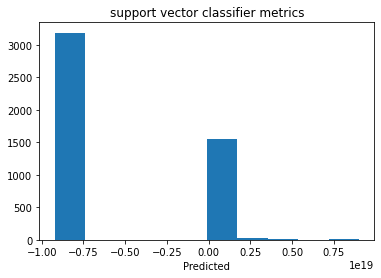

In [ ]:
import matplotlib.pyplot as plt
plt.title("support vector classifier metrics")
plt.hist(new_prediction)
plt.xlabel('Predicted')

plt.show()

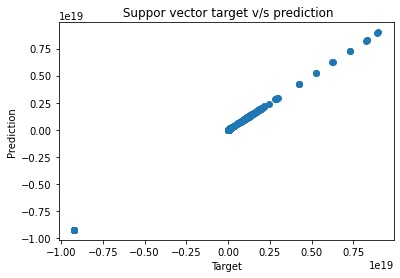

In [ ]:
plt.title(" Suppor vector target v/s prediction")
plt.scatter(x_val,new_prediction)
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.show()

<h1><b>M5: Techniques for improving model performance</b></h1><br> (Hyper parameter Tuning, Class balancing, Feature Engineering, Regularization, Ensemble Learning, Hybrid Approaches, etc.) <br>by 16 November

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
scores

array([0.80237524, 0.80257273, 0.9171092 , 0.78610377, 0.85555   ])

Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_model=BaggingRegressor(
    base_estimator=DecisionTreeRegressor(),
    n_estimators=200,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
bag_model.fit(x,y)
a=bag_model.oob_score_

In [ ]:
a1=bag_model.predict(x)
a1

array([-9.22337204e+18, -9.22337204e+18, -9.22337204e+18, ...,
       -9.22337204e+18, -9.22337204e+18, -9.22337204e+18])

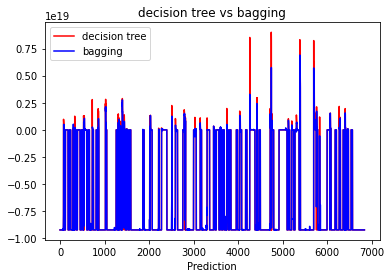

In [ ]:
import matplotlib.pyplot as plt
plt.title("decision tree vs bagging")
plt.plot(predict,'r',label='decision tree')
plt.plot(a1,'b-',label='bagging')
#plt.scatter(predict,a1)
plt.xlabel('Prediction')
plt.legend(loc ="upper left")
plt.show()

Ensemble voting regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
er = VotingRegressor([('lr', regr),
                      ('rf', new_model), ('r3', model)])
er.fit(x_train, x_val)
vr=er.predict(x_train)


In [ ]:
score_vr =er.score(x_train, x_val)

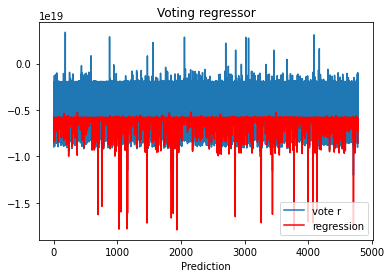

In [ ]:
plt.title("Voting regressor")
plt.plot(vr, label='vote r')
plt.plot(y_pred,'r-',label='regression')
plt.xlabel('Prediction')
plt.legend(loc='lower right')
plt.show()

AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train, x_val)
ada=regr.predict(x_train)


In [ ]:
ada_score=regr.score(x_train, x_val)

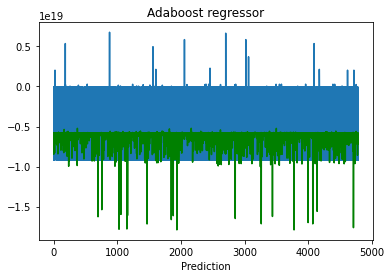

In [ ]:
plt.title("Adaboost regressor")
plt.plot(ada)
plt.plot(y_pred,'g-')
# plt.plot(new_pred,'-g')

plt.xlabel('Prediction')
plt.show()

Gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, x_val)
reg_pred=reg.predict(x_train)


In [ ]:
grad_score=reg.score(x_train, x_val)

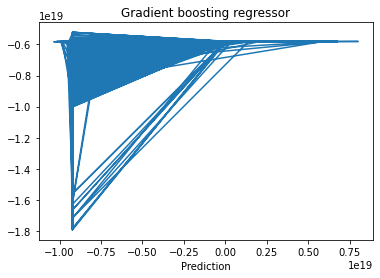

In [ ]:
plt.title("Gradient boosting regressor")
plt.plot(reg_pred,y_pred)
plt.xlabel('Prediction')
plt.show()

Our attributes are not at all correlated so neither of them can be dropped.(no scope for dimensionality reduction)

In [ ]:
data_corr=df.corr()
data_corr

,Total
Total,1.0


Correlation b/w features

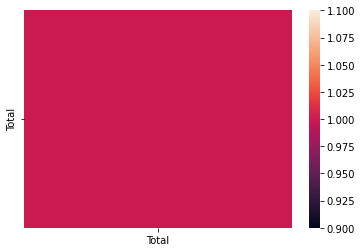

In [ ]:
sns.heatmap(data_corr)

In [ ]:
a  # bag model score
score_vr =er.score(x_train, x_val)  # voting regressor
ada_score # adaboost score
grad_score #gradient boosting

0.9830821625732601

In [ ]:
scores_list=[a,score_vr,ada_score,grad_score]
scores_list

[0.9789537020262015, 0.8900666701946586, 0.889229305201193, 0.9830821625732601]

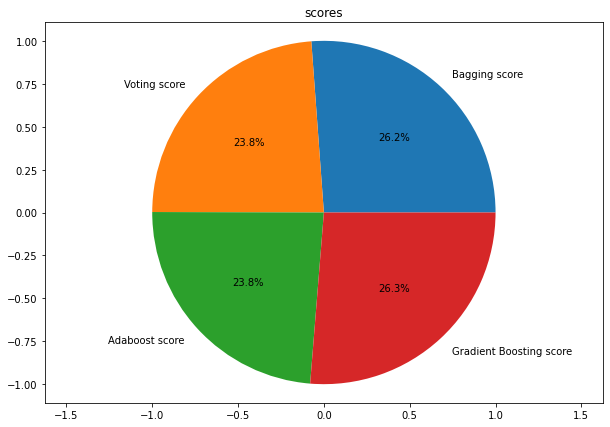

In [ ]:
import numpy as np
 # Creating dataset
my_labels =['Bagging score','Voting score','Adaboost score','Gradient Boosting score']

data = scores_list

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = my_labels, autopct='%1.1f%%', frame=True)
plt.axis('equal')
plt.title('scores')
# show plot
plt.show()

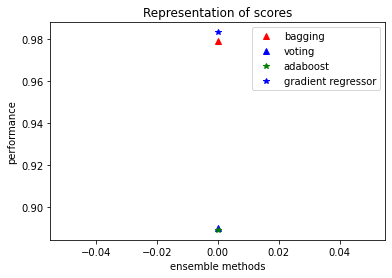

In [ ]:
plt.title('Representation of scores')
plt.plot(a,'r^',label='bagging')
plt.plot(score_vr,'b^',label='voting')
plt.plot(ada_score,'g*',label='adaboost')
plt.ylabel('performance')
plt.xlabel('ensemble methods')
plt.plot(grad_score,'b*',label='gradient regressor')
plt.legend(loc='upper right')
plt.show()